In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('experiment_1_result.csv')

In [75]:
df

,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,causal_mech,dataset,dataset_name,dataset_index,algo
0,0,0.396226,0.888889,0.700000,24,20,3,1,53,36,194.006015,mix_mechanism,medium_all_1,medium_all,1,cam
1,0,0.566038,0.638889,1.000000,35,22,5,8,53,36,15.372262,mix_mechanism,medium_all_1,medium_all,1,notears
2,0,0.421053,0.594595,0.551724,24,9,8,7,38,37,120.551037,mix_mechanism,medium_all_2,medium_all,2,cam
3,0,0.547170,0.648649,1.000000,36,23,7,6,53,37,16.071666,mix_mechanism,medium_all_2,medium_all,2,notears
4,0,0.578947,0.470588,0.687500,29,11,7,11,38,34,118.181599,mix_mechanism,medium_all_3,medium_all,3,cam
5,0,0.770833,0.323529,1.156250,48,25,11,12,48,34,16.006497,mix_mechanism,medium_all_3,medium_all,3,notears
6,0,0.500000,0.463415,0.760000,34,12,15,7,38,41,150.192227,mix_mechanism,medium_none_noise_1,medium_none_noise,1,cam
7,0,0.536585,0.463415,0.880000,38,16,16,6,41,41,11.990729,mix_mechanism,medium_none_noise_1,medium_none_noise,1,notears
8,0,0.500000,0.463415,0.760000,34,12,15,7,38,41,138.646061,mix_mechanism,medium_none_noise_2,medium_none_noise,2,cam
9,0,0.536585,0.463415,0.880000,38,16,16,6,41,41,13.680740,mix_mechanism,medium_none_noise_2,medium_none_noise,2,notears


In [76]:
grouped_df = df.groupby(by=['dataset_name', 'algo']).aggregate('mean').reset_index()
grouped_df

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_all,cam,0.0,0.465409,0.651357,0.646408,25.666667,13.333333,6.000000,6.333333,43.000000,35.666667,144.246217,2.0
1,medium_all,notears,0.0,0.628014,0.537022,1.052083,39.666667,23.333333,7.666667,8.666667,51.333333,35.666667,15.816808,2.0
2,medium_none_no_noise,cam,0.0,0.480000,0.634146,0.960000,30.000000,15.000000,6.000000,9.000000,50.000000,41.000000,176.502928,2.0
3,medium_none_no_noise,notears,0.0,0.411765,0.731707,0.840000,29.000000,18.000000,8.000000,3.000000,51.000000,41.000000,10.517096,2.0
4,medium_none_noise,cam,0.0,0.500000,0.463415,0.760000,34.000000,12.000000,15.000000,7.000000,38.000000,41.000000,141.885806,2.0
5,medium_none_noise,notears,0.0,0.536585,0.463415,0.880000,38.000000,16.000000,16.000000,6.000000,41.000000,41.000000,12.488287,2.0


In [77]:
grouped_df[grouped_df['dataset_name']=='medium_all']

,dataset_name,algo,Unnamed: 0,fdr,tpr,fpr,shd,false_pos,false_neg,reserved_edges,pred_size,true_size,timing,dataset_index
0,medium_all,cam,0.0,0.465409,0.651357,0.646408,25.666667,13.333333,6.000000,6.333333,43.000000,35.666667,144.246217,2.0
1,medium_all,notears,0.0,0.628014,0.537022,1.052083,39.666667,23.333333,7.666667,8.666667,51.333333,35.666667,15.816808,2.0


In [78]:
melt_rate_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['fdr', 'tpr', 'fpr'], value_name='rate', var_name='measurement')
melt_rate_df.head()

,dataset_name,algo,dataset_index,measurement,rate
0,medium_all,cam,2.0,fdr,0.465409
1,medium_all,notears,2.0,fdr,0.628014
2,medium_none_no_noise,cam,2.0,fdr,0.480000
3,medium_none_no_noise,notears,2.0,fdr,0.411765
4,medium_none_noise,cam,2.0,fdr,0.500000


In [79]:
melt_abs_err_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['shd', 'false_pos', 'false_neg', 'reserved_edges', 'pred_size', 'true_size'], value_name='value', var_name='measurement')
melt_abs_err_df.head()

,dataset_name,algo,dataset_index,measurement,value
0,medium_all,cam,2.0,shd,25.666667
1,medium_all,notears,2.0,shd,39.666667
2,medium_none_no_noise,cam,2.0,shd,30.000000
3,medium_none_no_noise,notears,2.0,shd,29.000000
4,medium_none_noise,cam,2.0,shd,34.000000


In [80]:
melt_time_df = pd.melt(grouped_df, id_vars=['dataset_name', 'algo', 'dataset_index'], value_vars=['timing'], value_name='seconds', var_name='measurement')
melt_time_df.head()


,dataset_name,algo,dataset_index,measurement,seconds
0,medium_all,cam,2.0,timing,144.246217
1,medium_all,notears,2.0,timing,15.816808
2,medium_none_no_noise,cam,2.0,timing,176.502928
3,medium_none_no_noise,notears,2.0,timing,10.517096
4,medium_none_noise,cam,2.0,timing,141.885806


In [98]:
metrics_dfs = [melt_rate_df, melt_abs_err_df, melt_time_df]
dataset_names = list(melt_time_df['dataset_name'].unique())
len(dataset_names)

3

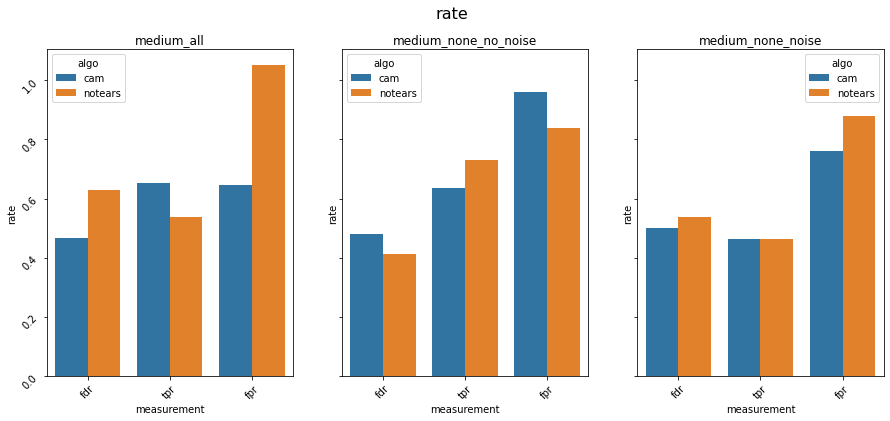

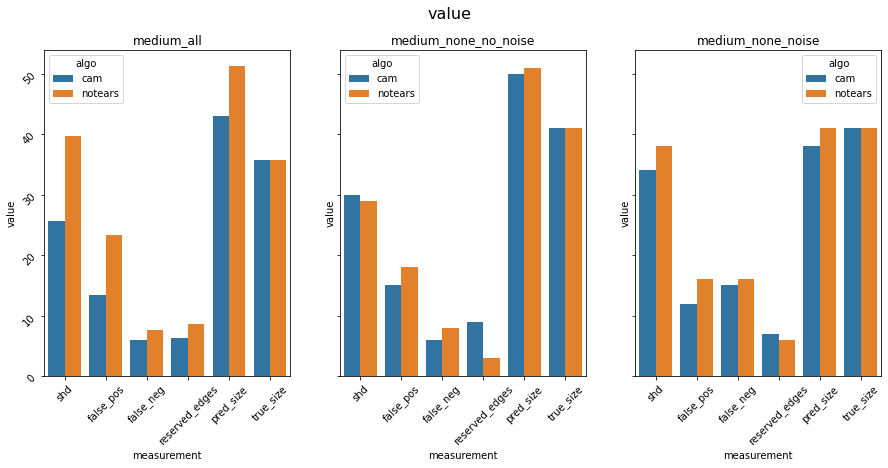

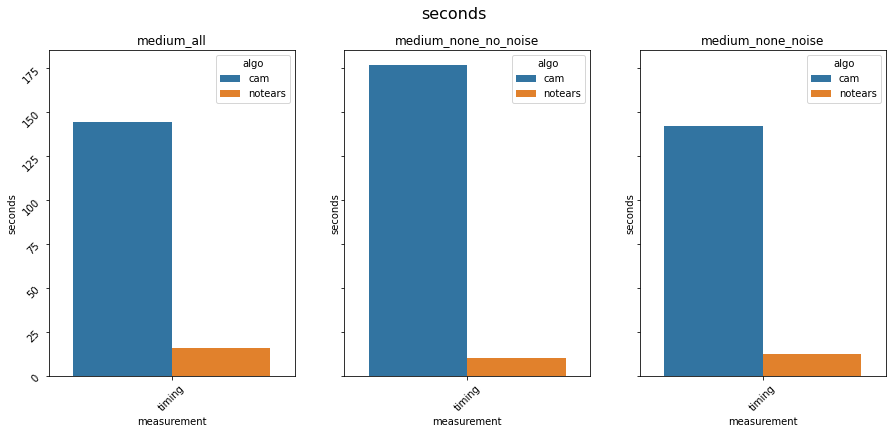

In [100]:
for metrics in metrics_dfs:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    sns.barplot(ax=ax1, y=list(metrics.columns)[-1], x='measurement',data=metrics[metrics['dataset_name'] == dataset_names[0]], hue='algo')
    sns.barplot(ax=ax2, y=list(metrics.columns)[-1], x='measurement',data=metrics[metrics['dataset_name'] == dataset_names[1]], hue='algo')
    sns.barplot(ax=ax3, y=list(metrics.columns)[-1], x='measurement',data=metrics[metrics['dataset_name'] == dataset_names[2]], hue='algo')
    ax1.tick_params(labelrotation=45)
    ax2.tick_params(labelrotation=45)
    ax3.tick_params(labelrotation=45)
    ax1.title.set_text(dataset_names[0])
    ax2.title.set_text(dataset_names[1])
    ax3.title.set_text(dataset_names[2])
    fig.suptitle(list(metrics.columns)[-1], fontsize=16)
    plt.show()